**Chapter 12 - Let Me Count the Ways**

**<u>Dealing with Random Phenomena</u>**

A **random phenomenon** is a situation in which we know what outcomes could happen, but we don’t know which particular outcome did or will happen.

- In general, each occasion upon which we observe a random phenomenon is called a **trial**.

- At each trial, we note the value of the random phenomenon, and call it an **outcome**.

- When we combine outcomes, the resulting combination is an **event.**

- The collection of all possible outcomes is called the **sample space**.

**<u>The Law of Large Numbers</u>**

<u>Example:</u> You keep track of what happens at an intersection each day. A graph of the accumulated percentage of green lights looks like this:

In [ ]:
# @title 📈 Law of Large Numbers Simulator - Click 'Run Simulation'
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, clear_output

# Configuration
TRUE_PROB = 60 # Default true probability (60%)
COLOR_GREEN = '#2E7D32'
COLOR_RED = '#C62828'

# State management
class LLNSimulator:
    def __init__(self):
        self.days = []
        self.outcomes = []
        self.percentages = []
        self.current_day = 0
        self.successes = 0
        
        self.plot_out = widgets.Output()
        self.table_out = widgets.Output()
        
    def reset(self):
        self.days = []
        self.outcomes = []
        self.percentages = []
        self.current_day = 0
        self.successes = 0
        self.update_display()
        
    def run_trials(self, count):
        new_outcomes = np.random.random(count) < (TRUE_PROB / 100.0)
        for result in new_outcomes:
            self.current_day += 1
            if result: self.successes += 1
            self.days.append(self.current_day)
            self.outcomes.append('Green' if result else 'Red')
            self.percentages.append((self.successes / self.current_day) * 100)
        self.update_display()

    def update_display(self):
        with self.plot_out:
            clear_output(wait=True)
            if not self.days:
                fig, ax = plt.subplots(figsize=(7, 5))
                ax.set_xlim(0, 1000)
                ax.set_ylim(0, 100)
                ax.set_ylabel('Percent Green', fontsize=12)
                ax.set_xlabel('Day Number', fontsize=12)
                ax.set_title('Accumulated Percentage over Time', fontsize=14)
                plt.show()
                return

            fig, ax = plt.subplots(figsize=(7, 5))
            ax.plot(self.days, self.percentages, color=COLOR_GREEN, linewidth=2)
            ax.axhline(y=TRUE_PROB, color='#555', linestyle='--', alpha=0.5, label=f'True Prob ({TRUE_PROB}%)')
            
            ax.set_ylim(0, 100)
            ax.set_ylabel('Percent Green', fontsize=12)
            ax.set_xlabel('Day Number', fontsize=12)
            ax.set_title('Accumulated Percentage over Time', fontsize=14)
            ax.grid(True, linestyle=':', alpha=0.6)
            
            # Show landmark ticks
            landmarks = [1, 2, 6, 100, 300, 500, 800]
            current_ticks = [t for t in landmarks if t <= self.current_day]
            if self.current_day not in current_ticks: current_ticks.append(self.current_day)
            ax.set_xticks(sorted(list(set(current_ticks))))
            
            plt.show()

        with self.table_out:
            clear_output(wait=True)
            if not self.days:
                display(HTML("<p style='color:#777;'>No data yet.</p>"))
                return
            
            html = '<div style="max-height: 300px; overflow-y: auto;"><table style="width:100%; border-collapse: collapse; text-align: center; font-family: sans-serif; font-size: 0.9em;">'
            html += '<tr style="background-color: #f2f2f2; position: sticky; top: 0;"><th>Day</th><th>Light</th><th>% Green</th></tr>'
            
            if len(self.days) <= 12:
                rows = range(len(self.days))
            else:
                rows = list(range(5)) + [None] + list(range(len(self.days)-5, len(self.days)))

            for i in rows:
                if i is None:
                    html += '<tr><td colspan="3" style="padding: 5px; color: #999;">... skipping ...</td></tr>'
                    continue
                c = COLOR_GREEN if self.outcomes[i] == 'Green' else COLOR_RED
                bg = "#fff" if i % 2 == 0 else "#fafafa"
                html += f'<tr style="background-color: {bg}; border-bottom: 1px solid #eee;">'
                html += f'<td style="padding: 5px;">{self.days[i]}</td>'
                html += f'<td style="padding: 5px; color:{c}; font-weight:bold;">{self.outcomes[i]}</td>'
                html += f'<td style="padding: 5px;">{self.percentages[i]:.1f}%</td></tr>'
            html += '</table></div>'
            display(HTML(html))

sim = LLNSimulator()

header = widgets.HTML("""
<div style="background-color: #f8f9fa; padding: 15px; border-radius: 8px; border-left: 5px solid #2E7D32; margin-bottom: 10px;">
    <h3 style="margin-top: 0; color: #2E7D32;">The Law of Large Numbers (LLN)</h3>
    <p style="margin-bottom: 5px;">The <b>Law of Large Numbers</b> states that the long-run relative frequency of repeated independent events gets closer and closer to a single value—the theoretical probability.</p>
    <p style="margin-top: 0;">Because this definition is based on repeatedly observing trial outcomes, it is often called <b>empirical probability</b>.</p>
</div>
""")

batch_dropdown = widgets.Dropdown(
    options=[('Add 1 Day', 1), ('Add 5 Days', 5), ('Add 50 Days', 50), ('Add 100 Days', 100), ('Add 500 Days', 500)],
    value=1,
    description='Step:',
    style={'description_width': 'initial'}
)

run_btn = widgets.Button(description='Run Simulation', button_style='primary', icon='play', layout=widgets.Layout(width='150px'))
reset_btn = widgets.Button(description='Reset', button_style='', layout=widgets.Layout(width='80px'))

def on_run(_): sim.run_trials(batch_dropdown.value)
def on_reset(_): sim.reset()

run_btn.on_click(on_run)
reset_btn.on_click(on_reset)

footer = widgets.HTML("""
<div style="margin-top: 10px; padding: 10px; border-top: 1px solid #eee;">
    <p style="font-size: 0.95em; color: #444;">
        <b>Summary:</b> Observe the <i>Percent Green</i> line. At low day numbers, the percentage is volatile and can jump significantly with each new trial. 
        As you simulate more days, the percentage <b>settles down</b> and stabilizes around the theoretical probability (60%), visually demonstrating the Law of Large Numbers.
    </p>
</div>
""")

controls_box = widgets.VBox([
    widgets.HTML("<b>Interactive Data Table & Controls</b>"),
    sim.table_out,
    widgets.VBox([batch_dropdown, widgets.HBox([run_btn, reset_btn])], layout=widgets.Layout(margin='10px 0 0 0'))
], layout=widgets.Layout(width='38%', margin='0 0 0 20px'))

main_content = widgets.HBox([sim.plot_out, controls_box], layout=widgets.Layout(align_items='flex-start'))

display(header, main_content, footer)
sim.run_trials(1)


**<u>The Nonexistent Law of Averages</u>**

THE LAW OF AVERAGES DOES NOT EXIST! The LLN says nothing about short-run behavior. Relative frequencies even out only in the long run, and this long run is infinitely long.

<u>Example:</u> One common proposal for beating the lottery is to note which numbers have come up lately, eliminate those from consideration, and bet on numbers that have not come up for a long time. Proponents of this method argue that in the long run, every number should be selected equally often, so those that haven’t come up are due. Use the simulator below to explore why this is faulty reasoning.

In [ ]:
# @title 🎰 The Lottery Fallacy Simulator - Is a number "due"?
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, clear_output

# Configuration: Simple Pick-10 lottery (numbers 0-9)
NUM_OPTIONS = 10
COLOR_COLD = '#546E7A'
COLOR_HOT = '#FFB300'
COLOR_NEUTRAL = '#1E88E5'

class LotterySim:
    def __init__(self):
        self.history = []
        self.output = widgets.Output()
        self.status = widgets.HTML("<i>Click to simulate the 'Cold Number' scenario...</i>")
        
    def find_cold_number(self, threshold=30):
        # Reset and simulate until one number hasn't appeared for 'threshold' draws
        self.history = []
        counts_since_last = np.zeros(NUM_OPTIONS)
        draws = 0
        
        while np.max(counts_since_last) < threshold:
            draw = np.random.randint(0, NUM_OPTIONS)
            self.history.append(draw)
            counts_since_last += 1
            counts_since_last[draw] = 0
            draws += 1
            if draws > 5000: break # Safety break
            
        self.cold_num = np.argmax(counts_since_last)
        self.miss_streak = int(np.max(counts_since_last))
        self.update_ui()
        self.status.value = f"<span style='color:red;'>Found it!</span> Number <b>{self.cold_num}</b> hasn't appeared in <b>{self.miss_streak}</b> draws. Many people think it is now <b>'due'</b>."

    def test_next_draws(self, trials=1000):
        if not hasattr(self, 'cold_num'):
            self.status.value = "<b>Please find a cold number first!</b>"
            return
            
        # Run many 'next draws' and see how often the 'cold' number hits
        next_draws = np.random.randint(0, NUM_OPTIONS, size=trials)
        hits = np.count_nonzero(next_draws == self.cold_num)
        expected = trials / NUM_OPTIONS
        
        with self.output:
            clear_output(wait=True)
            fig, ax = plt.subplots(figsize=(7, 4))
            unique, counts = np.unique(next_draws, return_counts=True)
            
            # Map counts to all 10 positions
            full_counts = np.zeros(NUM_OPTIONS)
            for u, c in zip(unique, counts):
                full_counts[u] = c
                
            colors = [COLOR_NEUTRAL] * NUM_OPTIONS
            colors[self.cold_num] = COLOR_HOT
            
            bars = ax.bar(range(NUM_OPTIONS), full_counts, color=colors)
            ax.axhline(expected, color='black', linestyle='--', alpha=0.5, label='Theoretical Expectation (10%)')
            
            ax.set_xticks(range(NUM_OPTIONS))
            ax.set_xlabel('Lottery Number')
            ax.set_ylabel(f'Hits in {trials} Next Draws')
            ax.set_title(f'Frequency of Outcomes Following the {self.miss_streak}-Draw Cold Streak')
            ax.legend()
            
            # Highlight the cold number result
            hit_pct = (hits/trials)*100
            self.status.value = f"<b>Results:</b> In the {trials} draws <i>after</i> the streak, number {self.cold_num} hit {hits} times (<b>{hit_pct:.1f}%</b>).<br>" + \
                               f"It didn't come up more often just because it was 'late'. The odds were still exactly {100/NUM_OPTIONS:.0f}% every time."
            plt.show()

    def update_ui(self):
        with self.output:
            clear_output(wait=True)
            html = f"<p>Number <b>{self.cold_num}</b> is 'Cold'. It has missed {self.miss_streak} draws in a row.</p>"
            display(HTML(html))

sim = LotterySim()

# UI Parts
header = widgets.HTML("""
<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #1E88E5; margin-bottom: 10px;">
    <h3 style="margin-top: 0; color: #1E88E5;">The Nonexistent Law of Averages</h3>
    <p>A common lottery proposal is to avoid numbers that came up lately and bet on numbers that are <b>"due"</b> because they haven't appeared in a long time.</p>
    <p><b>Faulty Reasoning:</b> Proponents argue that in the long run, every number should be selected equally often, so cold numbers must "catch up." 
    In reality, the lottery machine has no memory!</p>
</div>
""")

find_btn = widgets.Button(description='Find a "Cold" Number', button_style='warning', layout=widgets.Layout(width='200px'))
test_btn = widgets.Button(description='Run 1000 Next Draws', button_style='success', layout=widgets.Layout(width='200px'))

find_btn.on_click(lambda _: sim.find_cold_number(40))
test_btn.on_click(lambda _: sim.test_next_draws(1000))

controls = widgets.HBox([find_btn, test_btn])
display(header, sim.status, controls, sim.output)


**<u>Modeling Probability</u>**

When probability was first studied, a group of French mathematicians looked at games of chance in which all the possible outcomes were **equally likely**. They developed mathematical models of **theoretical probability**.

- It’s equally likely to get any one of six outcomes from the roll of a fair die.

- It’s equally likely to get heads or tails from the toss of a fair coin.

However, keep in mind that events are not always equally likely.

- A skilled basketball player has a better than 50-50 chance of making a free throw.

The probability of an event is the number of outcomes in the event divided by the total number of possible outcomes.

$P(A)\  = \ \frac{\#\ of\ favorable\ outcomes\ of\ A}{\#\ of\ all\ possible\ outcomes}$

**<u>How to Count</u>**

Fundamental Counting Principle (Part 1: OR)

- If event A has m outcomes and event B has n *different* outcomes, then the number of outcomes in event A or B is m + n.

> <u>Example:</u> You stop at a local café and find that the Lunch Special menu lists 4 salads and 5 sandwiches. For \$5 you can have any salad or sandwich for lunch. How many options are available?

Fundamental Counting Principle (Part 2: AND)

- If event A has m outcomes and *independent* event B has n *different* outcomes, then the number of outcomes in event A and B is mn.

> <u>Example</u>: For bigger eaters this café offers the Hungry Special: any salad and any sandwich
>
> for \$8. How many different lunches are possible now?
>
> <u>Example</u>: Standard Connecticut license plates consist of two letters then five numbers. Assuming all possibilities, how many license plates are available for CT vehicles?

In [ ]:
# @title 🥗 The Lunch Special: Addition Rule (OR)
import ipywidgets as widgets
from IPython.display import display, HTML

def update_or_rule(salads, sandwiches):
    total = salads + sandwiches
    display(HTML(f"""
    <div style="border: 2px solid #2E7D32; padding: 15px; border-radius: 10px; background-color: #f1f8e9;">
        <h4 style="color: #2E7D32; margin-top:0;">Rule of Addition (OR)</h4>
        <p>If you choose <b>1</b> item from <b>Set A</b> ({salads} options) <b>OR</b> <b>1</b> item from <b>Set B</b> ({sandwiches} options):</p>
        <p style="font-size: 1.2em; font-weight: bold;">{salads} + {sandwiches} = <span style="color: #c62828;">{total} Total Options</span></p>
    </div>
    """))

salads_slider = widgets.IntSlider(value=4, min=1, max=10, description='Salads:')
sands_slider = widgets.IntSlider(value=5, min=1, max=10, description='Sandwiches:')

ui = widgets.HBox([salads_slider, sands_slider])
out = widgets.interactive_output(update_or_rule, {'salads': salads_slider, 'sandwiches': sands_slider})

display(ui, out)


In [ ]:
# @title 🍔 The Hungry Special & License Plates: Multiplication Rule (AND)
import ipywidgets as widgets
from IPython.display import display, HTML

def update_and_rule(salads, sandwiches):
    total = salads * sandwiches
    display(HTML(f"""
    <div style="border: 2px solid #1565C0; padding: 15px; border-radius: 10px; background-color: #e3f2fd; margin-bottom: 20px;">
        <h4 style="color: #1565C0; margin-top:0;">Rule of Multiplication (AND)</h4>
        <p>If you choose <b>1</b> item from <b>Set A</b> ({salads} options) <b>AND</b> <b>1</b> item from <b>Set B</b> ({sandwiches} options):</p>
        <p style="font-size: 1.25em; font-weight: bold;">{salads} × {sandwiches} = <span style="color: #c62828;">{total} Possible Combinations</span></p>
    </div>
    """))

def plate_calc(letters, numbers):
    # Standard CT: 2 letters, 5 numbers
    total = (26**letters) * (10**numbers)
    display(HTML(f"""
    <div style="border: 1px dashed #555; padding: 10px; border-radius: 5px; background-color: #fff;">
        <b>License Plate Calculator:</b><br>
        Pattern: {letters} Letters and {numbers} Numbers<br>
        Calculation: 26<sup>{letters}</sup> × 10<sup>{numbers}</sup> = <span style="color: blue;">{total:,}</span> unique plates.
    </div>
    """))

# Hungry Special Controls
salads_s = widgets.IntSlider(value=4, min=1, max=10, description='Salads:')
sands_s = widgets.IntSlider(value=5, min=1, max=10, description='Sandwiches:')

# License Plate Controls
let_s = widgets.Dropdown(options=[1,2,3], value=2, description='Letters:')
num_s = widgets.Dropdown(options=[1,2,3,4,5,6], value=5, description='Numbers:')

ui_hungry = widgets.VBox([widgets.Label("<b>Hungry Special (Salad AND Sandwich):</b>"), widgets.HBox([salads_s, sands_s])])
out_hungry = widgets.interactive_output(update_and_rule, {'salads': salads_s, 'sandwiches': sands_s})

ui_plate = widgets.VBox([widgets.Label("<b>License Plate Explorer:</b>"), widgets.HBox([let_s, num_s])])
out_plate = widgets.interactive_output(plate_calc, {'letters': let_s, 'numbers': num_s})

display(ui_hungry, out_hungry, ui_plate, out_plate)


**<u>Permutations and Combinations</u>**

A **factorial** starts with a number and multiplies by each smaller number down to 1.

> <u>Notation</u>: n!
>
> <u>Example</u>: $8! = 8 \cdot 7 \cdot 6 \cdot 5 \cdot 4 \cdot 3 \cdot 2 \cdot 1 = 40,320$

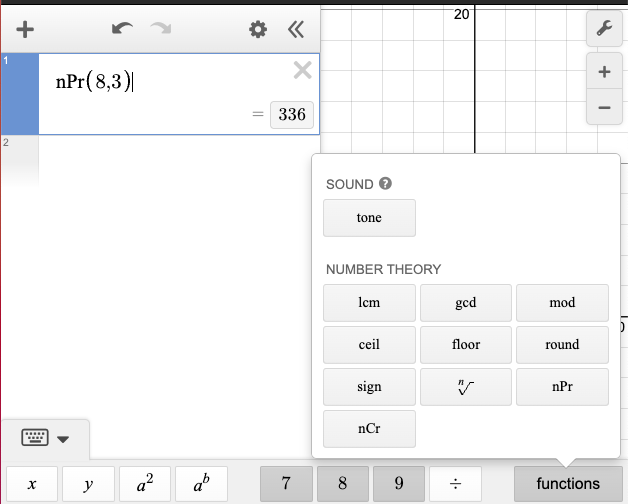

**Permutations** are the number of different ways you can arrange (order) a group of objects.

> <u>Equation:</u>${}_{n}{P_{r} = \frac{n!}{(n - r)!}}_{}$, arrange any *r* items from a group of *n* different items
>
> <u>Example</u>: How many different ways are there for 8 runners to finish 1st, 2nd, and 3rd?
>
> That is, we want the “**permutations** of 8 things taken 3 at a time.”
>
> ${}_{n}{P_{r} = \frac{n!}{(n - r)!} \Rightarrow}_{}{}_{8}{P_{3} = \frac{8!}{(8 - 3)!} = \frac{8!}{5!} = \frac{8 \cdot 7 \cdot 6 \cdot 5 \cdot 4 \cdot 3 \cdot 2 \cdot 1}{5 \cdot 4 \cdot 3 \cdot 2 \cdot 1} =}_{}$$8 \cdot 7 \cdot 6$ = 336

**Combinations** are the number of different ways you can arrange a group of objects, BUT

you don’t care about what order the things are in.

> <u>Equation:</u>${}_{n}{C_{r} = \frac{n!}{r!(n - r)!}}_{}$, select any *r* items from a group of *n* different items.
>
> <u>Example:</u> You order a triple scoop ice cream cone. You probably don’t care what order the delicious flavors are in the cone. There are eight choices for ice cream. How many scoop combinations are possible?
>
> ${}_{n}{C_{r} = \frac{n!}{r!(n - r)!} \Rightarrow}_{}{}_{8}{C_{3} = \frac{8!}{3!(8 - 3)!} = \frac{8!}{3! \cdot 5!} = \frac{8 \cdot 7 \cdot 6 \cdot 5 \cdot 4 \cdot 3 \cdot 2 \cdot 1}{3 \cdot 2 \cdot 1 \cdot 5 \cdot 4 \cdot 3 \cdot 2 \cdot 1} = \frac{8 \cdot 7 \cdot 6}{3 \cdot 2 \cdot 1}}_{}$= 56


### Interactive Experiments: Permutations vs. Combinations

Understanding the difference between **Order Matters** (Permutations) and **Order Doesn't Matter** (Combinations) is crucial.

**Scenario: The Pizza Shop**
Imagine you are ordering a pizza.
*   **n (Total Items):** The number of toppings available at the shop (e.g., Pepperoni, Mushrooms, Onions, etc.).
*   **r (Items to Choose):** The number of toppings you want on your pizza.

**Explore:**
*   Does the order of toppings matter? (Is a "Pepperoni & Mushroom" pizza different from a "Mushroom & Pepperoni" pizza?) -> **Combination**.
*   What if we were assigning specific awards (1st place, 2nd place, 3rd place) to people? -> **Permutation**.

Use the tool below to see how the number of possibilities grows as you add more items.


In [ ]:
# @title 🥣 Permutations vs. Combinations Explorer - Click 'Play' to Start

import ipywidgets as widgets
import math
from IPython.display import display, HTML, clear_output

# Create the sliders
style = {'description_width': '150px'}
n_slider = widgets.IntSlider(value=5, min=1, max=20, step=1, description='Total Items (n):', style=style)
r_slider = widgets.IntSlider(value=3, min=1, max=20, step=1, description='Items to Choose (r):', style=style)

# Create an output area
output_area = widgets.Output()

def update_output(change=None):
    n = n_slider.value
    r = r_slider.value
    
    with output_area:
        clear_output(wait=True)
        
        if r > n:
            display(HTML("<div style='color:red; padding:10px; border:1px solid red; border-radius:5px;'><b>Error:</b> You cannot choose more items (r) than available options (n).</div>"))
            return
            
        perm = math.perm(n, r)
        comb = math.comb(n, r)
        ratio = perm / comb if comb > 0 else 0
        
        html = f"""
        <div style="border: 2px solid #4CAF50; padding: 15px; border-radius: 8px; background-color: #f9f9f9; width: 95%;">
            <h3 style="color: #4CAF50; margin-top:0;">Results for n={n}, r={r}</h3>
            
            <table style="width: 100%; border-collapse: collapse;">
                <tr style="background-color: #e8f5e9;">
                    <td style="padding: 10px; border: 1px solid #ccc;"><b>🎯 Permutations</b><br>(Order Matters)</td>
                    <td style="padding: 10px; border: 1px solid #ccc;"><i>P(n, r) = n! / (n-r)!</i></td>
                    <td style="padding: 10px; border: 1px solid #ccc;"><b style="color:#2e7d32; font-size:1.2em;">{perm:,}</b></td>
                </tr>
                <tr style="background-color: #fff3e0;">
                    <td style="padding: 10px; border: 1px solid #ccc;"><b>🎲 Combinations</b><br>(Order Doesn't Matter)</td>
                    <td style="padding: 10px; border: 1px solid #ccc;"><i>C(n, r) = n! / (r! × (n-r)!)</i></td>
                    <td style="padding: 10px; border: 1px solid #ccc;"><b style="color:#e65100; font-size:1.2em;">{comb:,}</b></td>
                </tr>
            </table>
            
            <div style="margin-top: 15px; padding: 10px; background-color: #e3f2fd; border-radius: 5px;">
                <p style="margin:0;"><b>💡 Key Insight:</b> There are {ratio:.1f} times more ways to arrange items when order matters than when it doesn't.</p>
            </div>
        </div>
        """
        display(HTML(html))

# Bind the sliders to the update function
n_slider.observe(update_output, names='value')
r_slider.observe(update_output, names='value')

# Initial trigger
update_output()

# Layout everything
layout = widgets.VBox([
    widgets.HTML("<b>Use the sliders below to see the difference between Permutations and Combinations:</b>"),
    n_slider, 
    r_slider, 
    output_area
])

display(layout)


**<u>Combinations and Probability</u>**

- First, find the total number of possible outcomes.

- Then find the number of outcomes that we care about in this problem.

- Finally, divide those two numbers, and you’ve got a probability!

<u>Permutations or Combinations</u>: Do not do any arithmetic.

1)  How many 13-card bridge hands could you be dealt from a deck of cards?

2)  How many 3-turn combinations could a padlock have if there are 60 numbers on the dial and combinations can’t have repeated numbers?

3)  How many batting orders could a baseball manager create using the 9 players in his starting lineup?

4)  How many 6-player volleyball squads could a coach put on the floor if there are 9 players on the team?

In [ ]:
# @title 📊 Selection Tool: Permutations vs. Combinations
import ipywidgets as widgets
import math
from IPython.display import display, HTML

def calc_selections(n, r, mode):
    if r > n:
        print("Error: r cannot be greater than n")
        return
    
    if mode == 'Permutation (P)':
        res = math.perm(n, r)
        sym = "P"
        formula = f"{n}! / ({n} - {r})!"
    else:
        res = math.comb(n, r)
        sym = "C"
        formula = f"{n}! / ({r}! * ({n} - {r})!)"
        
    display(HTML(f'''
    <div style="border: 2px solid #5C6BC0; padding: 15px; border-radius: 10px; background-color: #e8eaf6;">
        <h4 style="margin-top:0; color: #3949AB;">Result: {n}{sym}{r}</h4>
        <p>Formula: <code>{formula}</code></p>
        <p style="font-size: 1.4em; font-weight: bold; color: #1A237E;">{res:,}</p>
    </div>
    '''))

n_in = widgets.IntSlider(value=52, min=1, max=100, description='Total (n):')
r_in = widgets.IntSlider(value=13, min=1, max=100, description='Choose (r):')
mode_in = widgets.ToggleButtons(options=['Permutation (P)', 'Combination (C)'], description='Order Matters?')

ui = widgets.VBox([widgets.HBox([n_in, r_in]), mode_in])
out = widgets.interactive_output(calc_selections, {'n': n_in, 'r': r_in, 'mode': mode_in})
display(ui, out)

<u>Example:</u>

Chances are you use a password of some kind every day, whether you’re getting cash from an ATM, logging in to get your email, or checking up on your friends on Instagram. One factor that helps make these codes secure is the large number of possibilities. In each of the situations below, how many different passwords are there?

a) The access code for an ATM is 4 digits (example: 3551).

b) When you forget your password, some sites send you a temporary one and make you change it when you log in. One such site’s temporary password is 5 characters, alternating letter-digit-letter-digit-letter (example: a7r3w).

c) The temporary password can alternate letters and digits with either a letter or a temporary password digit first (examples: a7r3w or 8m8k3).

d) That temporary password can be any mixture of letters and digits in any order, and is case-sensitive (example: mp27g isn’t the same as mP27g).

In [ ]:
# @title 🔐 Password Complexity Explorer
import ipywidgets as widgets
from IPython.display import display, HTML

def calc_passwords(scenario):
    if scenario == '4-Digit ATM':
        total = 10**4
        desc = "10 × 10 × 10 × 10"
    elif scenario == 'L-D-L-D-L (5 chars)':
        total = 26 * 10 * 26 * 10 * 26
        desc = "26³ × 10²"
    elif scenario == 'Alt L/D (Starts L or D)':
        # Start L (L-D-L-D-L) or Start D (D-L-D-L-D)
        way1 = 26**3 * 10**2
        way2 = 10**3 * 26**2
        total = way1 + way2
        desc = "(26³ × 10²) + (10³ × 26²)"
    else: # Mixed 5-char case-sensitive
        # (26 letters + 26 upper + 10 digits) = 62 items
        total = 62**5
        desc = "62⁵"
        
    display(HTML(f'''
    <div style="border: 2px solid #FB8C00; padding: 15px; border-radius: 10px; background-color: #fff3e0;">
        <h4 style="margin-top:0; color: #E65100;">{scenario}</h4>
        <p>Calculation: {desc}</p>
        <p style="font-size: 1.3em; font-weight: bold; color: #BF360C;">{total:,} Total Possibilities</p>
    </div>
    '''))

scen = widgets.Dropdown(
    options=['4-Digit ATM', 'L-D-L-D-L (5 chars)', 'Alt L/D (Starts L or D)', 'Mixed (Case-Sensitive)'],
    description='Scenario:'
)
display(widgets.interactive(calc_passwords, scenario=scen))

<u>Example</u>:

The betting slips for New Jersey’s Pick-6 Lotto game offer a field of numbers from 1 to 49. Each bettor chooses any 6 of them. You win the grand prize if your six numbers match those randomly chosen on TV by the NJ Lottery. How many different selections are possible?

In [ ]:
# @title 🎰 Picking the Winning Numbers
import ipywidgets as widgets
import math
from IPython.display import display, HTML

def update_lotto(n, r):
    combos = math.comb(n, r)
    display(HTML(f'''
    <div style="border: 2px solid #43A047; padding: 15px; border-radius: 10px; background-color: #e8f5e9;">
        <h4 style="margin-top:0; color: #2E7D32;">Picking {r} from {n}</h4>
        <p>There are <b>{combos:,}</b> unique ways to fill out a slip.</p>
        <p style="font-size: 0.9em; color: #666;">Probability of winning 1 slip: {1/combos:.10f}</p>
    </div>
    '''))

n_sld = widgets.IntSlider(value=49, min=1, max=100, description='Field (n):')
r_sld = widgets.IntSlider(value=6, min=1, max=10, description='Pick (r):')

display(widgets.interactive(update_lotto, n=n_sld, r=r_sld))

<u>Example</u>:

A county legislature consists of 13 elected representatives, 8 Democrats and 5 Republicans. They’re setting up a 4-person committee to study the proposal to build a new library. How many different committees could be formed if the group will consist of:

a) 4 Republicans?

b) 4 Democrats?

c) 2 Democrats and 2 Republicans? (Remember, “and” means multiply.)

d) 3 Democrats and 1 Republican?

e) 2 or 3 Democrats (and the rest Republicans)?

In [ ]:
# @title 🏛️ Committee Combination Builder
import ipywidgets as widgets
import math
from IPython.display import display, HTML

def build_comm(dem_pick, rep_pick):
    # Total available: 8 Dem, 5 Rep
    if dem_pick > 8 or rep_pick > 5:
        print("Not enough representatives available!")
        return
        
    d_ways = math.comb(8, dem_pick)
    r_ways = math.comb(5, rep_pick)
    total = d_ways * r_ways
    
    display(HTML(f'''
    <div style="border: 2px solid #795548; padding: 15px; border-radius: 10px; background-color: #efebe9;">
        <h4 style="margin-top:0; color: #5D4037;">Committee: {dem_pick} D, {rep_pick} R</h4>
        <p>Ways to pick Democrats: 8C{dem_pick} = {d_ways}</p>
        <p>Ways to pick Republicans: 5C{rep_pick} = {r_ways}</p>
        <p style="font-size: 1.2em; font-weight: bold; border-top: 1px solid #ccc; padding-top:10px;">
           Total: {d_ways} × {r_ways} = <span style="color: #d84315;">{total} unique committees</span>
        </p>
    </div>
    '''))

d_s = widgets.IntSlider(value=2, min=0, max=8, description='Dems to Pick:')
r_s = widgets.IntSlider(value=2, min=0, max=5, description='Reps to Pick:')

display(widgets.interactive(build_comm, dem_pick=d_s, rep_pick=r_s))

<u>Example</u>:

In the last chapter, we asked whether there was something fishy about a college residence hall lottery. A total of 57 students, including 20 people on the same varsity team, applied for just 3 very desirable rooms. When all 3 winners turned out to be team members, the other students cried foul. Is it reasonable to believe this could have happened by chance? Or would it be really unusual if the process were fair? Earlier we used a simulation to help us think about this issue. Now let’s find the probability that all the rooms would go to the teammates if everything were done fairly.

In [ ]:
# @title 🏟️ Varsity Lottery: Probability Calculator
import ipywidgets as widgets
import math
from IPython.display import display, HTML

def calc_lottery(n_total, k_team, r_winners):
    if r_winners > n_total or k_team > n_total:
        return
        
    total_ways = math.comb(n_total, r_winners)
    # Success means picking r_winners from the k_team members
    if r_winners > k_team:
        success_ways = 0
    else:
        success_ways = math.comb(k_team, r_winners)
        
    prob = success_ways / total_ways
    
    display(HTML(f'''
    <div style="border: 2px solid #009688; padding: 15px; border-radius: 10px; background-color: #e0f2f1;">
        <h4 style="margin-top:0; color: #00796B;">Lottery Probability</h4>
        <p>Total ways to pick {r_winners} from {n_total}: {total_ways:,}</p>
        <p>Ways to pick {r_winners} solely from the group of {k_team}: {success_ways:,}</p>
        <p style="font-size: 1.3em; font-weight: bold;">Probability: {prob:.4f} ({prob*100:.2f}%)</p>
    </div>
    '''))

n_t = widgets.IntSlider(value=57, min=10, max=200, description='Total Applicants:')
k_t = widgets.IntSlider(value=20, min=1, max=100, description='Team Members:')
r_w = widgets.IntSlider(value=3, min=1, max=10, description='Winners:')

display(widgets.interactive(calc_lottery, n_total=n_t, k_team=k_t, r_winners=r_w))

<u>Example</u>:

A DVD Grab Bag contains 6 movies chosen at random from 15 recently popular titles, including 4 comedies, 8 dramas, and 3 animated features.

Find the probability you get:

a) nothing but dramas.

b) 3 of the comedies and 3 of the dramas.

c) all 3 of the animated flicks and any 3 other movies.

In [ ]:
# @title 📀 DVD Grab Bag Probability
import ipywidgets as widgets
import math
from IPython.display import display, HTML

def calc_dvd(c, d, a):
    # Total movies: 15, Picking: 6
    if (c + d + a) > 6:
        print("Total picked must be 6!")
        return
    
    total_space = math.comb(15, 6)
    
    # Calculate combinations for specific subsets
    # a) Nothing but dramas (6 from 8)
    ways_a = math.comb(8, 6)
    
    # b) 3 Com (from 4) AND 3 Dra (from 8)
    ways_b = math.comb(4, 3) * math.comb(8, 3)
    
    # c) 3 Ani (from 3) AND 3 others (from 12)
    ways_c = math.comb(3, 3) * math.comb(12, 3)
    
    p_a = ways_a / total_space
    p_b = ways_b / total_space
    p_c = ways_c / total_space
    
    display(HTML(f'''
    <div style="border: 2px solid #f44336; padding: 15px; border-radius: 10px; background-color: #ffebee;">
        <h4 style="margin-top:0; color: #d32f2f;">Grab Bag results (Total nCr = {total_space:,})</h4>
        <ul>
            <li><b>Scenario A:</b> 6 Dramas -> {ways_a} / {total_space} = {p_a:.4f}</li>
            <li><b>Scenario B:</b> 3 Com / 3 Dra -> {ways_b} / {total_space} = {p_b:.4f}</li>
            <li><b>Scenario C:</b> 3 Ani / 3 Other -> {ways_c} / {total_space} = {p_c:.4f}</li>
        </ul>
    </div>
    '''))

# This widget is essentially a fixed report but we can make it interactive if we wanted to change the bag contents
calc_dvd(0,0,0) # Just show results for the problem


### Interactive Experiment: The Birthday Problem

A famous counter-intuitive result in probability (using Combinations!) is the **Birthday Problem**.

**Question:** How many people do you need in a room so that there is a **50% chance** that at least two of them allow share the same birthday?

*   Most people guess a high number (like 180).
*   **Move the slider** to find out the real answer.
*   (Hint: It has to do with how many *pairs* of people you can form. With 23 people, there are ${23 \choose 2} = 253$ possible pairs!)


In [ ]:
# @title Click 'Play' to Run Code

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

def birthday_paradox_sim(k_people=23):
    # Theoretical Calculation
    # P(No Match) = 365/365 * 364/365 * ... * (365-k+1)/365
    prob_no_match = 1.0
    for i in range(k_people):
        prob_no_match *= (365 - i) / 365
    prob_match = 1 - prob_no_match
    
    # Simulation (Run 1000 times)
    n_sims = 1000
    matches = 0
    for _ in range(n_sims):
        birthdays = np.random.randint(1, 366, size=k_people)
        if len(birthdays) != len(set(birthdays)):
            matches += 1
    sim_prob = matches / n_sims
    
    # Visualization
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Bar Chart comparison
    bars = ax.bar(['Theoretical P(Match)', f'Simulated P(Match)\n(n={n_sims})'], 
           [prob_match, sim_prob], color=['skyblue', 'lightgreen'])
    
    ax.set_ylim(0, 1.0)
    ax.set_ylabel('Probability')
    ax.set_title(f"The Birthday Problem (Group Size: {k_people})")
    
    # Add labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1%}', ha='center', va='bottom', fontsize=12, weight='bold')
                
    # Threshold Line at 50%
    ax.axhline(0.5, color='red', linestyle='--', alpha=0.5)
    ax.text(0.5, 0.52, '50% Chance Threshold', color='red', ha='center')
    
    plt.show()

display(widgets.interactive(birthday_paradox_sim, 
                            k_people=widgets.IntSlider(value=23, min=2, max=100, step=1, description='People in Room:')))
